## 0. Prepare

In [0]:
!nvidia-smi

In [0]:
!pip uninstall numpy
!pip install numpy==1.14.6
!pip install mxnet-cu100
# !pip install d2l

In [0]:
import mxnet as mx
import matplotlib.pyplot as plt
import numpy as np

from time import time

In [2]:

# Testing that GPU works.
a = mx.nd.ones((2, 3), mx.gpu())
b = a * 2 + 1
print(b)


[[3. 3. 3.]
 [3. 3. 3.]]
<NDArray 2x3 @gpu(0)>


## 1. Computing C=AB using CPU

In [29]:
# construct two matrices A and B
tic = time()

A = mx.nd.random.normal(shape=(4096,4096))
A.wait_to_read()
B = mx.nd.random.normal(shape=(4096,4096))
B.wait_to_read()

cpu_t0 = time()-tic
print("Construct two 4096*4096 matrices using CPU takes {0}s.".format(format(cpu_t0, '0.2f')))

Construct two 4096*4096 matrices using CPU takes 1.47s.


In [30]:
# case1. compute C=AB using CPU
tic = time()

res = mx.nd.dot(A, B)
res.wait_to_read()

cpu_t1 = time()-tic
print("Compute C=AB using CPU takes {0}s.".format(format(cpu_t1, '0.2f')))

Compute C=AB using CPU takes 2.19s.


## 2. Computing C=AB using GPU

In [32]:
# construct two matrices A and B
tic = time()

A = mx.nd.random.normal(shape=(4096,4096), ctx=mx.gpu())
A.wait_to_read()
B = mx.nd.random.normal(shape=(4096,4096), ctx=mx.gpu())
B.wait_to_read()

gpu_t0 = time()-tic
print("Construct two 4096*4096 matrices using CPU takes {0}s.".format(format(gpu_t0, '0.2f')))

Construct two 4096*4096 matrices using CPU takes 0.02s.


In [34]:
# case2. compute C=AB using GPU
tic = time()

res = mx.nd.dot(A, B)
res.wait_to_read()

gpu_t1 = time()-tic
print("Construct two 4096*4096 matrices using CPU takes {0}s.".format(format(gpu_t1, '0.2f')))

Construct two 4096*4096 matrices using CPU takes 0.05s.


## 3.Time Comparision

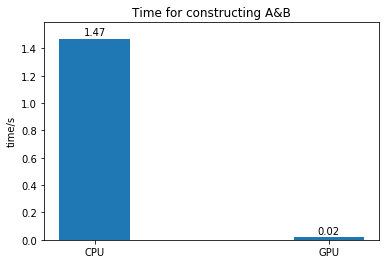

In [85]:
x = range(2)
y = [cpu_t0, gpu_t0]

fig, ax = plt.subplots()
ax.set_title('Time for constructing A&B')
ax.annotate
plt.bar(x, y, width=0.3)
plt.xticks(x, ('CPU', 'GPU'))
plt.ylabel('time/s')

for a,b in zip(x,y):
  plt.text(a, b+0.01, '%.02f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,max(y)+0.12)
plt.show()

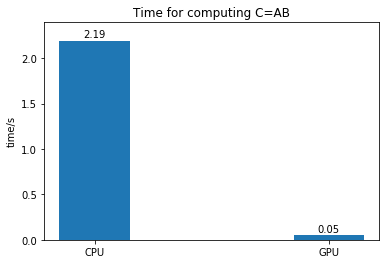

In [79]:
x = range(2)
y = [cpu_t1, gpu_t1]

fig, ax = plt.subplots()
ax.set_title('Time for computing C=AB')
plt.bar(x, y, width=0.3)
plt.xticks(x, ('CPU', 'GPU'))
plt.ylabel('time/s')
for a,b in zip(x,y):
  plt.text(a, b+0.01, '%.02f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylim(0,max(y)+0.2)
plt.show()
